<div style="background-color:#caeec2; padding:10px; border-radius:6px; color:black;" >

### 1.  Data Collection And Preparation
</div>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import skew

<div style="background-color:#f0f8ff; padding:10px; border-radius:6px; color:black;" >
Here, I am loading the dataset, and doing some initial cleaning.


</div>


In [2]:
# Loading the dataset
luke_hair_data = pd.read_csv('Data/luke_hair_loss_documentation.csv')

# Checking the structure of the dataset
print(luke_hair_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   date                    400 non-null    object 
 1   hair_loss               400 non-null    object 
 2   stay_up_late            400 non-null    int64  
 3   pressure_level          400 non-null    object 
 4   coffee_consumed         400 non-null    int64  
 5   brain_working_duration  400 non-null    int64  
 6   school_assesssment      95 non-null     object 
 7   stress_level            400 non-null    object 
 8   shampoo_brand           400 non-null    object 
 9   swimming                400 non-null    object 
 10  hair_washing            400 non-null    object 
 11  hair_grease             396 non-null    float64
 12  dandruff                111 non-null    object 
 13  libido                  400 non-null    int64  
dtypes: float64(1), int64(4), object(9)
memory 

In [3]:
luke_hair_data.head()

,date,hair_loss,stay_up_late,pressure_level,coffee_consumed,brain_working_duration,school_assesssment,stress_level,shampoo_brand,swimming,hair_washing,hair_grease,dandruff,libido
0,1/01/2021,Few,2,Low,0,1,NaN,Low,Pantene,No,Y,3.0,NaN,1
1,2/01/2021,Few,0,Low,0,3,NaN,Low,Pantene,No,N,1.0,NaN,1
2,3/01/2021,Medium,3,Low,1,0,NaN,Low,Pantene,Yes,Y,2.0,NaN,2
3,4/01/2021,Few,2,Low,0,1,NaN,Low,Pantene,No,N,3.0,NaN,3
4,5/01/2021,Few,2,Low,0,1,NaN,Low,Pantene,No,Y,1.0,NaN,2


<div style="background-color:#f0f8ff; padding:10px; border-radius:6px; color:black;" >
The dataset contains no missing values. Entries that were labeled as missing for ‘school assessment’ and ‘dandruff’ were updated to ‘No Assessment’ and ‘None,’ respectively.


</div>


In [4]:
luke_hair_data['school_assesssment'].replace(pd.NA, "No assessment" , inplace=True)
luke_hair_data['dandruff'].replace(pd.NA, "None" , inplace=True)
print(luke_hair_data.isnull().sum())

date                      0
hair_loss                 0
stay_up_late              0
pressure_level            0
coffee_consumed           0
brain_working_duration    0
school_assesssment        0
stress_level              0
shampoo_brand             0
swimming                  0
hair_washing              0
hair_grease               4
dandruff                  0
libido                    0
dtype: int64


<div style="background-color:#f0f8ff; padding:10px; border-radius:6px; color:black;" >
Now, I will provide the statistcal summaries of the key variables.


</div>


In [5]:
luke_hair_data.describe()

,stay_up_late,coffee_consumed,brain_working_duration,hair_grease,libido
count,400.000000,400.000000,400.000000,396.000000,400.000000
mean,1.910000,1.162500,3.970000,2.565657,2.787500
std,1.611954,1.978859,4.215272,1.276162,1.822264
min,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,0.000000,1.000000,2.000000,1.000000
50%,2.000000,0.000000,2.000000,2.000000,3.000000
75%,3.000000,1.000000,7.000000,4.000000,5.000000
max,8.000000,10.000000,18.000000,5.000000,5.000000


<div style="background-color:#ADD8E6; padding:10px; border-radius:6px; color:black;" >

#### Stay Up Late
- The dataset contains 400 entries.  
- On average, the individual scored 1.91 for staying up late, with a standard deviation of 1.61, indicating moderate variability in sleeping habits.  
- Values range from 0 to 8, showing that the individual rarely stays up late on some days and stays up late frequently on others.  

#### Coffee Consumed
- The mean coffee consumption is 1.16 units with a standard deviation of 1.98, suggesting high variability in intake.  
- Most days (50th percentile) have no coffee consumption, while on some days up to 10 units were consumed.  

#### Brain Working Duration
- The average brain working duration is 3.97 hours, with a standard deviation of 4.22, indicating considerable variation in daily work duration.  
- Values range from 0 to 18 hours, with a median of 2 hours.  

#### Hair Grease
- Hair greasing habits have a mean of 2.57 and a standard deviation of 1.28.  
- Values range from 1 to 5, showing that the individual used moderate levels of hair grease on most days.  

#### Libido
- The average libido score is 2.79 with a standard deviation of 1.82.  
- Scores range from 0 to 5, with a median of 3, indicating generally moderate levels across the recorded days.  


</div>

<div style="background-color:#f0f8ff; padding:10px; border-radius:6px; color:black;" >
Seeing the summary of the dataset, ther are some outliers in the data, especially in 'coffee_consumed' and 'brain_working_duration'. These outliers could potentially skew the analysis and may need to be addressed in the data cleaning process.


</div>


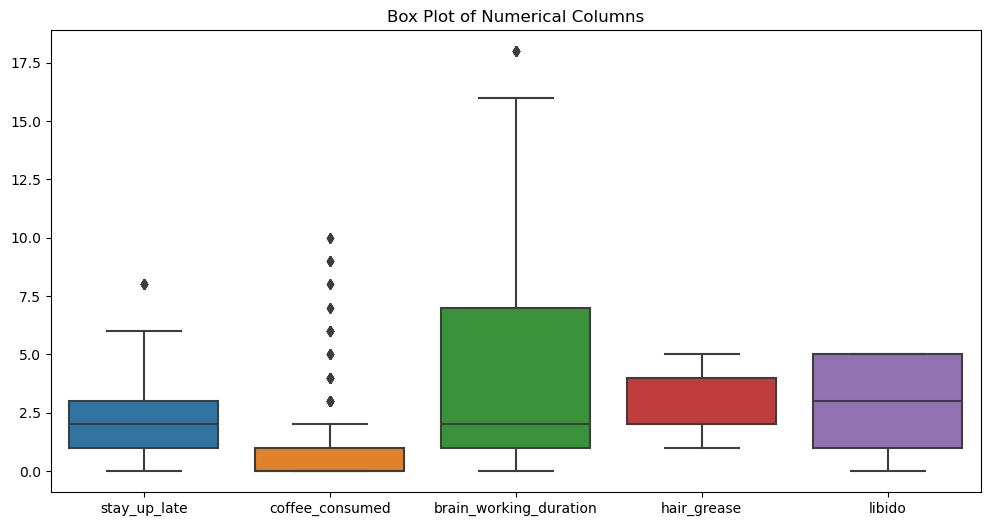

In [ ]:
numerical_cols = ['stay_up_late', 'coffee_consumed', 'brain_working_duration', 'hair_grease', 'libido']

plt.figure(figsize=(12,6))

sns.boxplot(data=luke_hair_data[numerical_cols])
plt.title('Box Plot of Numerical Columns')
plt.show()